<a href="https://colab.research.google.com/github/lahmuddin/Machine-Learning-after-Middle-Test/blob/main/Final%20Exam/Centiment%20%26%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment**

In [4]:
import zipfile,os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = 'drive/My Drive/Machine Learning'

In [7]:
# melakukan ekstraksi pada file zip
import zipfile,os,shutil
local_zip = 'drive/My Drive/Machine Learning/BinaryTextClassification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/BinaryTextClassification')
zip_ref.close()

In [8]:
os.listdir('/BinaryTextClassification')

['sentiment labelled sentences']

In [9]:
import pandas as pd
df = pd.read_csv('/BinaryTextClassification/sentiment labelled sentences/yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

In [10]:
df.tail()


,sentence,label
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [11]:
#split data train dan data test
from sklearn.model_selection import train_test_split
kalimat = df['sentence'].values
y = df['label'].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2)

In [12]:
#tokenisasi dan sequencing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
 #num_words: jumlah kata yang ditokenisasi
 #oov_token: nilai kata yang tidak ada pada tokenisasi
tokenizer = Tokenizer(num_words=250, oov_token='x') 
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)
 
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [13]:
#arsitektur layer embedding
#argumen pertama jumlah kata pada tokenizer
#argumen selanjutnya dimensi embedding dan input_length
import tensorflow as tf
model = tf.keras.Sequential([
    #parameter fungsi embedding
    #parameter pertama adalah jumlah vocab yang ditokenisasi
    #parameter kedua adalah jumlah dimensi
    #input_length adalah panjang sequence
    tf.keras.layers.Embedding(250, 16, input_length=20),
    #tidak pakai layer flatten tapi GlobalAveragePooling1D()
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [28]:
num_epochs = (31, 30)
history = model.fit(padded_latih, y_latih, epochs=num_epochs, 
                    validation_data=(padded_test, y_test), verbose=2)

TypeError: ignored

# **MNIST**

In [16]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [17]:
#objek menampung dataset
mnist = tf.keras.datasets.mnist

In [18]:
(gambar_latih, label_latih), (gambar_uji, label_uji) = mnist.load_data() #membagi dataset

11501568/11490434 [==============================] - 0s 0us/step


5


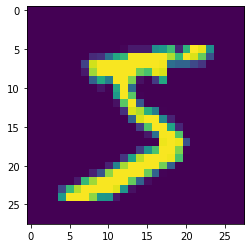

In [19]:
#menampilkan salah satu label dan gambar dengan matplotlib
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(gambar_latih[0])
print(label_latih[0])

In [20]:
#normalisasi secara manual
gambar_latih = gambar_latih/255.0
gambar_uji = gambar_uji/255.0


In [21]:
#arsitektur tiga layer
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [22]:
#optimizer dan loss
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
#melatih model
model.fit(gambar_latih, label_latih, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2616 - accuracy: 0.9246
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1162 - accuracy: 0.9652
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0800 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0584 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9857


In [23]:
#optimizer dan loss
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
#melatih model
#menggunakan batch size waktu yang dibutuhkan untuk training semakin singkat
#kalau batch_size tidak diinisiasi, nilai defaultnya adalah 32
model.fit(gambar_latih, label_latih, batch_size=128, epochs=5)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0282 - accuracy: 0.9923
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0210 - accuracy: 0.9944
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0180 - accuracy: 0.9955
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0141 - accuracy: 0.9970
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0119 - accuracy: 0.9975
